In [ ]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline



In [2]:
# --- Load dataset ---
house = pd.read_csv('socal2.csv')

In [3]:
house.head()

,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   street    15474 non-null  object 
 2   citi      15474 non-null  object 
 3   n_citi    15474 non-null  int64  
 4   bed       15474 non-null  int64  
 5   bath      15474 non-null  float64
 6   sqft      15474 non-null  int64  
 7   price     15474 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 967.3+ KB


In [5]:
house.describe()

,image_id,n_citi,bed,bath,sqft,price
count,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,1.547400e+04
mean,7736.500000,216.597518,3.506398,2.453251,2173.913209,7.031209e+05
std,4467.103368,112.372985,1.034838,0.958742,1025.339617,3.769762e+05
min,0.000000,0.000000,1.000000,0.000000,280.000000,1.950000e+05
25%,3868.250000,119.000000,3.000000,2.000000,1426.000000,4.450000e+05
50%,7736.500000,222.500000,3.000000,2.100000,1951.000000,6.390000e+05
75%,11604.750000,315.000000,4.000000,3.000000,2737.750000,8.349750e+05
max,15473.000000,414.000000,12.000000,36.000000,17667.000000,2.000000e+06


In [6]:
house.isnull().sum()

,0
image_id,0
street,0
citi,0
n_citi,0
bed,0
bath,0
sqft,0
price,0


In [7]:
house.sample()

,image_id,street,citi,n_citi,bed,bath,sqft,price
2802,2802,619 S Dodson Avenue,"San Pedro, CA",330,2,1.1,1443,859000


In [8]:
# --- Drop identifier columns ---
X = house.drop(['price', 'image_id'], axis=1)  # drop image_id as it is just an identifier
y = house['price']

In [9]:

# --- Identify numerical and categorical features ---
numerical_features = ['n_citi', 'bed', 'bath', 'sqft']
categorical_features = ['citi', 'street']

In [10]:


# --- Train/Test Split ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [12]:
# --- Linear Regression Model ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', LinearRegression())])

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

# --- Linear Regression Results ---
print("\nLinear Regression Results:")
print("R2:", r2_score(y_test, y_pred))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_lr)


Linear Regression Results:
R2: 0.7019429528299947
RMSE: 209597.31095945742


In [13]:

# --- Decision Tree Model ---
from sklearn.tree import DecisionTreeRegressor

dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor(random_state=42))])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# --- Decision Tree Results ---
print("\nDecision Tree Results:")
print("R2:", r2_score(y_test, y_pred_dt))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("RMSE:", rmse_dt)


Decision Tree Results:
R2: 0.5828964593899602
RMSE: 247946.4801561812


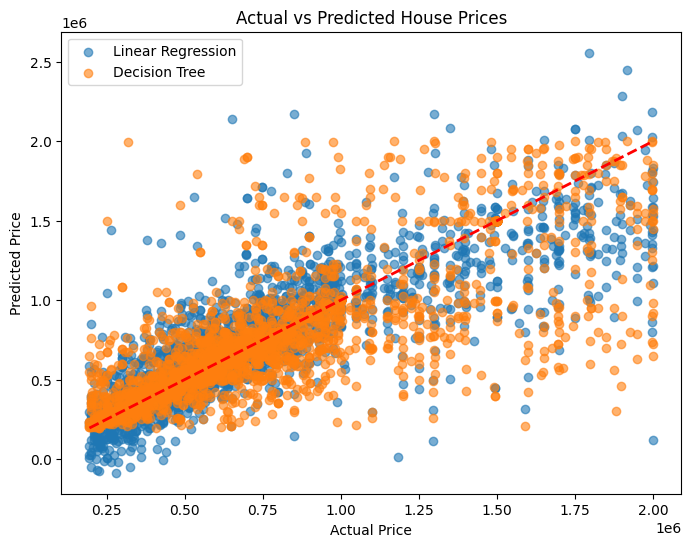

In [14]:

# --- Plot Actual vs Predicted Prices ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred_dt, alpha=0.6, label="Decision Tree")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

In [ ]:


# --- List of features used in training ---
feature_columns = ['n_citi', 'bed', 'bath', 'sqft', 'citi', 'street']

# Take user input
num_houses = int(input("How many houses do you want to predict? "))
user_inputs = []

for i in range(num_houses):
    print(f"\nEnter details for House {i+1}:")
    n_citi = int(input("City code (n_citi): "))
    bed = int(input("Bedrooms: "))
    bath = float(input("Bathrooms: "))
    sqft = float(input("Area (sqft): "))
    citi = input("City: ")
    street = input("Street: ")

    user_inputs.append({
        'n_citi': n_citi,
        'bed': bed,
        'bath': bath,
        'sqft': sqft,
        'citi': citi,
        'street': street
    })

# Convert to DataFrame
user_df = pd.DataFrame(user_inputs)

# Ensure column order matches training
user_df = user_df[feature_columns]

# Predict using the trained pipeline
predicted_prices = dt_model.predict(user_df)

# Show results
for i, price in enumerate(predicted_prices):
    print(f"\nPredicted price for House {i+1}: ₹ {price:,.0f}")

# --- Save the trained Decision Tree pipeline ---
joblib.dump(LR, 'final_model.joblib')
print("\nModel saved successfully!")

# --- Get feature names after preprocessing ---
# Use your pipeline preprocessor
model_column_list = dt_model.named_steps['preprocessor'].get_feature_names_out()
